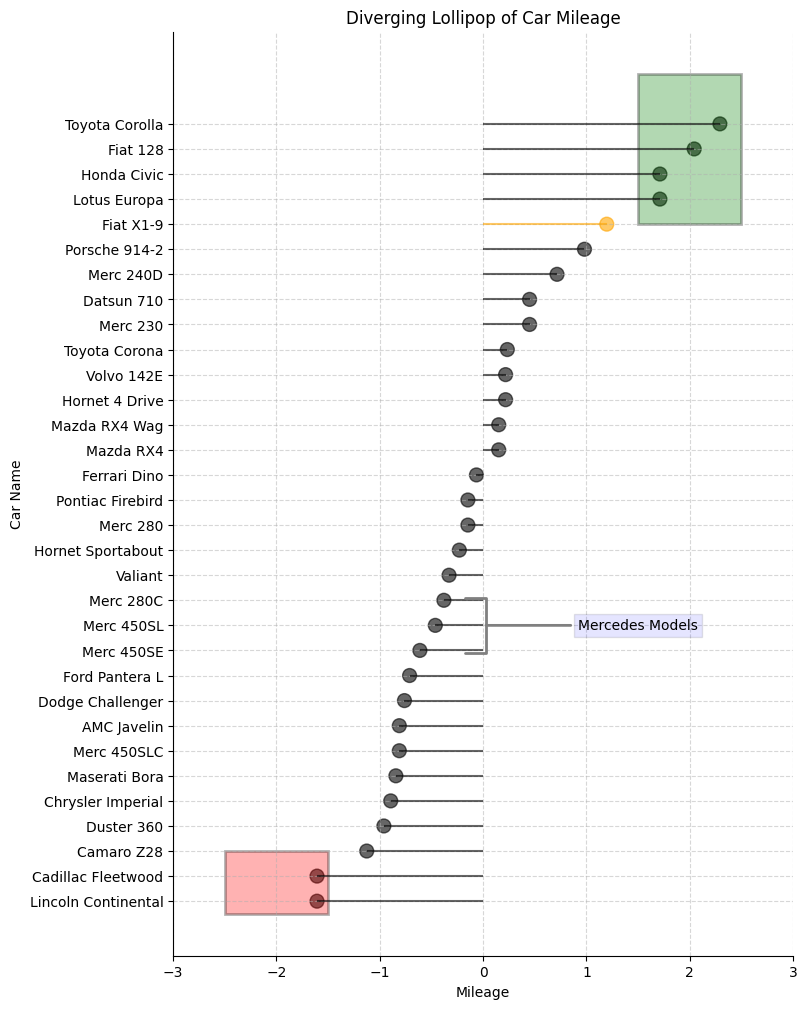

In [3]:
from imports import *
PATH = '../data/mtcars.csv'
df = pd.read_csv(PATH)

# More info:
# https://statisticsbyjim.com/glossary/standardization/
df['x_plot'] = (df['mpg'] - df['mpg'].mean()) / df['mpg'].std()

# sort value and reset the index
df.sort_values('x_plot', inplace=True)
df.reset_index(inplace=True)

df['color'] = df['model'].apply(lambda car_name: 'orange' if car_name == 'Fiat X1-9' else 'black')

fig = plt.figure(figsize=(8, 12))
ax = fig.add_subplot()

ax.hlines(y = df.index,
          xmin=0,
          xmax=df['x_plot'],
          color=df['color'],
          alpha=0.6)

# plot the dots
ax.scatter(x = df['x_plot'],
           y=df.index,
           s = 100,
           color = df['color'],
           alpha=0.6)

def add_patch(verts, ax, color):
    '''
        Takes the vertices and the axes as argument and adds the patch to our plot.
    '''
    codes = [
        Path.MOVETO,
        Path.LINETO,
        Path.LINETO,
        Path.LINETO,
        Path.CLOSEPOLY
    ]
    path = Path(verts, codes)
    pathpatch = PathPatch(path, facecolor = color, lw=2, alpha=0.3)
    ax.add_patch(pathpatch)
    
# coordinates for the bottom shape
verts_bottom = [
    (-2.5, -0.5), # left, bottom
    (-2.5, 2), # left, top
    (-1.5, 2), # right, top
    (-1.5, -0.5), # right, bottom
    (0., 0.) # ignored
]

# coordinates for the upper shape
verts_upper = [
    (1.5, 27), # left, bottom
    (1.5, 33), # left, top
    (2.5, 33), # right, top
    (2.5, 27), # right, bottom
    (0., 0.)
]

# use the function to add them to the existing plot
add_patch(verts_bottom, ax, color='red')
add_patch(verts_upper, ax, color='green')

# annotate text
ax.annotate('Mercedes Models',
            xy = (0.0, 11.0),
            xytext = (1.5, 11),
            xycoords= 'data',
            fontsize= 10,
            ha = 'center',
            va= 'center',
            bbox = dict(boxstyle='square', fc = 'blue', alpha = 0.1),
            arrowprops=dict(arrowstyle = '-[, widthB=2.0, lengthB=1.5', lw=2.0, color='grey'), color = 'black')

# set title
ax.set_title('Diverging Lollipop of Car Mileage')

# autoscale
ax.autoscale_view()

# change x lim
ax.set_xlim(-3, 3)

# set labels
ax.set_xlabel('Mileage')
ax.set_ylabel('Car Name')

ax.set_yticks(df.index)
ax.set_yticklabels(df.model)

ax.spines['right'].set_color('None')
ax.spines['top'].set_color('None')

ax.grid(linestyle='--', alpha = 0.5)

In [4]:
df.tail()

,index,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,x_plot,color
27,25,Fiat X1-9,27.3,4,79.0,66,4.08,1.935,18.90,1,1,4,1,1.196190,orange
28,27,Lotus Europa,30.4,4,95.1,113,3.77,1.513,16.90,1,1,5,2,1.710547,black
29,18,Honda Civic,30.4,4,75.7,52,4.93,1.615,18.52,1,1,4,2,1.710547,black
30,17,Fiat 128,32.4,4,78.7,66,4.08,2.200,19.47,1,1,4,1,2.042389,black
31,19,Toyota Corolla,33.9,4,71.1,65,4.22,1.835,19.90,1,1,4,1,2.291272,black
